# Data extraction

![texto alternativo](https://worldview.stratfor.com/sites/default/files/styles/article_full/public/cryptocurrency-gulf-display-shutterstock-1028639176.png?itok=K36RQG5A.jpg)

## Extracting (web scraping) daily data from top 200 cryptocurrencies available at  https://coinmarketcap.com/coins/ but also you can find more datasets with data by hour at https://www.cryptodatadownload.com/data/

In [1]:
# ► First libs

import plotly.express as px 
import pandas as pd
import re

In [2]:
# ► Scraping main table wit pandas

url = 'https://coinmarketcap.com/coins/views/all/'
df = pd.read_html(url)[2]
df.head()

,Rank,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24h),% 1h,% 24h,% 7d,Unnamed: 10
0,1,Bitcoin,BTC,"$227,466,899,512","$12,319.58","18,463,856 BTC","$28,436,485,884",0.14%,4.03%,4.05%,NaN
1,2,Ethereum,ETH,"$48,319,762,924",$430.56,"112,225,192 ETH","$13,136,145,654",0.01%,1.07%,9.14%,NaN
2,3,XRP,XRP,"$14,336,419,687",$0.319164,"44,918,719,274 XRP *","$3,017,065,596",0.46%,6.09%,6.72%,NaN
3,4,Bitcoin Cash,BCH,"$5,957,033,479",$322.13,"18,492,725 BCH","$2,345,610,178",1.38%,5.54%,6.94%,NaN
4,5,Litecoin,LTC,"$4,385,985,363",$67.20,"65,263,669 LTC","$3,896,668,718",-0.56%,6.24%,15.20%,NaN


In [3]:
# ► Getting rid of '$,' simbols

df.Price = df['Price'].apply(lambda x: float(re.sub('([$,]*)','',x)))
df.sort_values(by=['Price'], inplace=True, ascending=False)

In [4]:
# ► Below Bitcoin is omitted because its price is too high to appreciate the rest of the coins

fig = px.bar(df[1:], y='Price', x='Name', text='Name')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(template='seaborn', title='Coins available for scraping')
fig.show()

In [5]:
coins_available = list(df.Name)

In [6]:
# ► Repacing ' ' and '.' for '-' and deleting '[]#'  

coins_available = [re.sub('([\s+.])','-',coin.lower()).replace('[','').replace(']','').replace('#','') for coin in coins_available]

In [7]:
print(coins_available)

['bitcoin', 'ethereum', 'bitcoin-cash', 'bitcoin-sv', 'dash', 'monero', 'zcash', 'bitcoinpos', 'unobtanium', 'litecoin', 'bonorum', 'obyte', 'binance-coin', 'salus', 'counos-x', 'decred', 'neo', 'energy-web-token', 'kusama', 'bitcoin-gold', 'horizen', 'newyork-exchange', 'largo-coin', 'mimblewimblecoin', 'ethereum-classic', 'zcoin', 'chainx', 'cosmos', 'counos-coin', 'platincoin', 'bitcoinhd', 'waves', 'tezos', 'eos', 'qtum', 'ghostprism', 'solana', 'vitae', 'elastos', 'celo', 'btse', 'zenon', 'monacoin', 'factom', 'cryptonex', 'energi', 'lisk', 'hypercash', 'serum', 'zynecoin', 'blocknet', 'haven-protocol', 'tomochain', 'nano', 'stakecubecoin', 'dero', 'ontology', 'bitcoin-diamond', 'particl', 'komodo', 'skycoin', 'polis', 'zano', 'baer-chain', 'neblio', 'bhpcoin', 'gxchain', 'deviantcoin', 'grin', 'fusion', 'beam', 'stratis', 'bitcoin-2', 'insolar', 'aidos-kuneen', 'loki', 'algorand', 'ouroboros', 'terra', 'nebulas', 'aeon', 'ark', 'pivx', 'icon', 'ergo', 'nuls', 'massnet', 'namecoin

## Function to obtain some data coins like 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'.



In [8]:
# ► More libraries

import datetime 
import csv

In [9]:
# ► Function to extract data

def get_data(coins_available):
 
  # ► User types a number

  print(coins_available)
  coin_name = input('Type a valid coin name: ').lower()

  while True:

    if coin_name not in coins_available:
      print('Coin name should not contain spaces instead use "-" and type all in lowercase')
      coin_name = input('Type again a valid coin name: ').lower()
    else:
      break
  
  # ► Scrapping the coin name

  today = datetime.date.today()  # todays date
  mktcap_page = 'https://coinmarketcap.com/currencies/'+ coin_name +'/historical-data/?start=20130428&amp;end='+"{:%Y%m%d}".format(today)
  full_data = pd.read_html(mktcap_page)[2]
  full_data.rename(columns={'Open*': 'Open', 'Close**': 'Close'}, inplace=True)

  # ► This function replaces ',' for nothing and then changes data type from object to float

  def obj_to_num(df,cols):
      
      def obj_to_num(row):
          if ',' in str(row):
            row = row.replace(',','')
            return float(row)
          else:
            return float(row)

      for col in cols:     
          df[col] = df[col].apply(obj_to_num) 

      return df

  # ► This function changes data column type from object to timestamp[ns] and also can changes other columns to float 

  def prepare_data(file):
  
    columns = ['Open','High','Low','Close','Volume','Market Cap']
    file['Date'] = pd.to_datetime(file['Date'])
    num_data = obj_to_num(file,columns)

    return num_data

  return prepare_data(full_data)


## Coin exploration (Ethereum in this case)

You can type any coin (available in the list) to be analized

In [10]:
# ► Type the coin name you want

my_coin = get_data(coins_available)

['bitcoin', 'ethereum', 'bitcoin-cash', 'bitcoin-sv', 'dash', 'monero', 'zcash', 'bitcoinpos', 'unobtanium', 'litecoin', 'bonorum', 'obyte', 'binance-coin', 'salus', 'counos-x', 'decred', 'neo', 'energy-web-token', 'kusama', 'bitcoin-gold', 'horizen', 'newyork-exchange', 'largo-coin', 'mimblewimblecoin', 'ethereum-classic', 'zcoin', 'chainx', 'cosmos', 'counos-coin', 'platincoin', 'bitcoinhd', 'waves', 'tezos', 'eos', 'qtum', 'ghostprism', 'solana', 'vitae', 'elastos', 'celo', 'btse', 'zenon', 'monacoin', 'factom', 'cryptonex', 'energi', 'lisk', 'hypercash', 'serum', 'zynecoin', 'blocknet', 'haven-protocol', 'tomochain', 'nano', 'stakecubecoin', 'dero', 'ontology', 'bitcoin-diamond', 'particl', 'komodo', 'skycoin', 'polis', 'zano', 'baer-chain', 'neblio', 'bhpcoin', 'gxchain', 'deviantcoin', 'grin', 'fusion', 'beam', 'stratis', 'bitcoin-2', 'insolar', 'aidos-kuneen', 'loki', 'algorand', 'ouroboros', 'terra', 'nebulas', 'aeon', 'ark', 'pivx', 'icon', 'ergo', 'nuls', 'massnet', 'namecoin

In [11]:
my_coin.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2020-08-17,433.97,442.73,422.65,429.53,1.322709e+10,4.820343e+10
1,2020-08-16,433.35,436.27,415.09,433.79,1.216882e+10,4.867516e+10
2,2020-08-15,437.56,441.75,429.87,433.35,1.241607e+10,4.862082e+10
3,2020-08-14,428.68,444.58,423.35,437.40,1.506459e+10,4.906847e+10
4,2020-08-13,390.84,432.90,379.71,428.74,1.848030e+10,4.809157e+10


In [12]:
my_coin.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Market Cap           float64
dtype: object

In [13]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=my_coin['Date'], y=my_coin['Open'],
                    mode='lines',
                    name='Open'))
fig.add_trace(go.Scatter(x=my_coin['Date'], y=my_coin['High'],
                    mode='lines',
                    name='High'))
fig.add_trace(go.Scatter(x=my_coin['Date'], y=my_coin['Low'],
                    mode='lines',
                    name='Low'))
fig.add_trace(go.Scatter(x=my_coin['Date'], y=my_coin['Close'],
                    mode='lines',
                    name='Close'))

#fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title="Coin behavior from its beginning, price in USD")

fig.show()

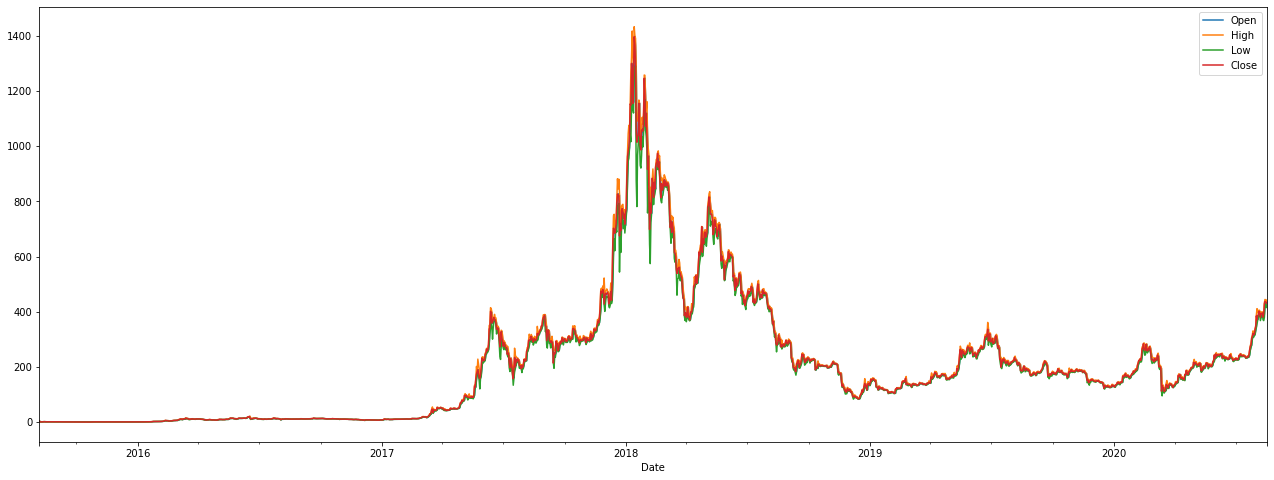

In [14]:
my_coin_graph = my_coin.set_index('Date') 
_ = my_coin_graph[['Open','High','Low','Close']].plot(figsize=(22, 8))

In [15]:
# ► Saving data to csv
my_coin.to_csv('my_coin_daily_data.csv')

## Models

### FbProphet

In [54]:
# ► Prophet

import fbprophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [17]:
# ► Data after 2017-01-01

my_coin_high = my_coin[['High','Date']][my_coin.Date >= '2017-01-01']

In [35]:
# ► Model won't see last 10 days to be compared

my_coin_high_p = my_coin_high[10:]

In [36]:
# ► Renaming columns for Prophet

my_coin_high_p = my_coin_high_p.rename(columns = {'Date':'ds','High':'y'})

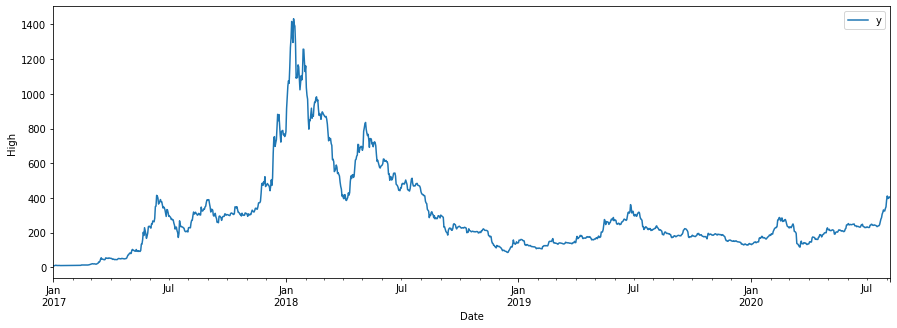

In [37]:
# ► Ploting

ax = my_coin_high_p.set_index('ds').plot(figsize=(15, 5))
ax.set_ylabel('High')
ax.set_xlabel('Date')

plt.show()

In [122]:
# ► setting this hyperparameter to 0.8  https://facebook.github.io/prophet/docs/trend_changepoints.html#adjusting-trend-flexibility
# ► 1.1 = mse(2805.25), 0.8 = mse(2857.13), 1.2 = mse(3015.23), 0.75 = mse(3038.22), 0.9 = mse(3039.19), 0.5 = mse(3182.94)   

m = fbprophet.Prophet(changepoint_prior_scale=1.1)

In [123]:
m.fit(my_coin_high_p)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [124]:
future = m.make_future_dataframe(periods=30)

In [125]:
forecast_p = m.predict(future)

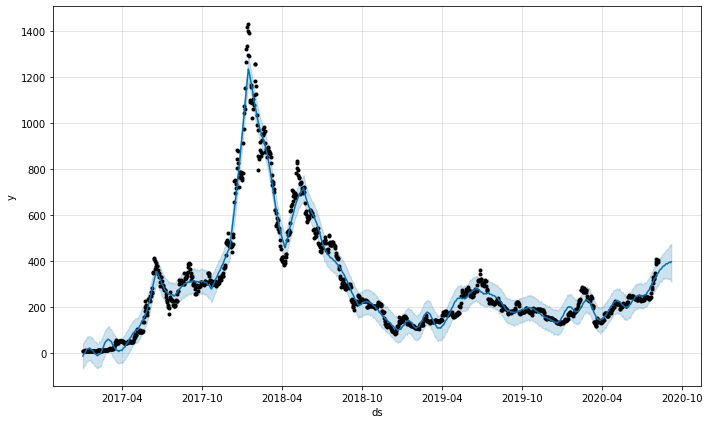

In [68]:
m.plot(forecast_p);

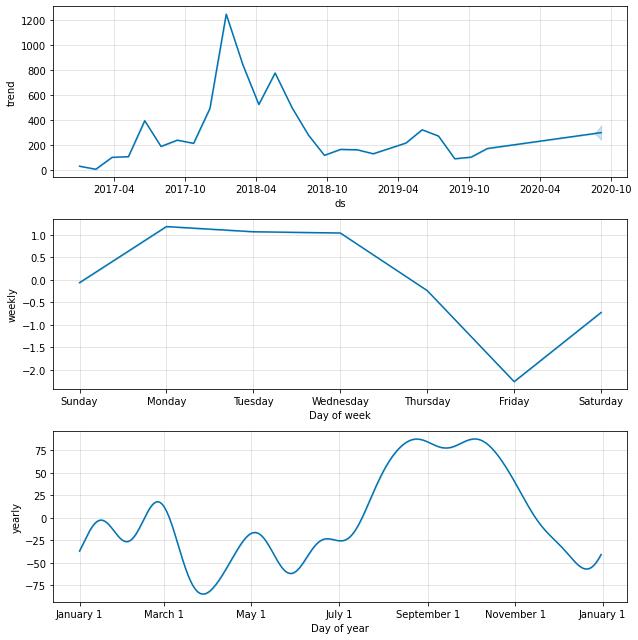

In [60]:
m.plot_components(forecast_p);

In [126]:
# ► predictions and real data

my_coin_inverse = my_coin_high.copy() 
my_coin_inverse.High = my_coin_inverse.High.values[::-1]                        # To change value orders from the original data
my_coin_forecast = pd.concat([forecast_p['ds'],my_coin_inverse['High'],forecast_p['yhat']], axis=1,keys=['date','high','prophet_high'])

In [127]:
# ► The model didn't see this high values

my_coin_forecast[-30:-20]

,date,high,prophet_high
1315,2020-08-08,393.99,358.155799
1316,2020-08-09,399.74,361.261930
1317,2020-08-10,399.38,364.813548
1318,2020-08-11,398.48,366.871944
1319,2020-08-12,391.31,368.886020
1320,2020-08-13,432.90,369.514797
1321,2020-08-14,444.58,369.266073
1322,2020-08-15,441.75,372.438476
1323,2020-08-16,436.27,374.602175
1324,2020-08-17,442.73,377.198990


In [128]:
print(mean_squared_error(my_coin_forecast.high[-30:-20],my_coin_forecast.prophet_high[-30:-20]))

2805.2588374535812


### Arima

In [129]:
!pip install pmdarima
from pmdarima.arima import auto_arima
from scipy import stats
from itertools import product
import warnings
import statsmodels.api as sm

     |████████████████████████████████| 1.5MB 4.7MB/s 
     |████████████████████████████████| 8.7MB 25.6MB/s 
     |████████████████████████████████| 2.1MB 48.0MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
